
# RETENCION CLIENTES TELEFONIA

**Contenido del Archivo de datos:**
Contiene 7043 filas (clientes) y 21 columnas (características).
La columna "Churn" es nuestro variable target.
Cada fila representa un cliente, cada columna contiene los atributos del cliente descritos en la columna Metadatos.

**El conjunto de datos incluye información sobre:**
Clientes que se fueron en el último mes. Columna Churn (Renuncia)
Servicios a los que se ha suscrito cada cliente: phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
Información de la cuenta del cliente: cuánto tiempo ha sido cliente, contrato, método de pago, facturación electrónica, cargos mensuales y cargos totales.
Información demográfica sobre los clientes: sexo, rango de edad y si tienen socios y dependientes
[Fuente](https://www.kaggle.com/blastchar/telco-customer-churn)

ATRIBUTOS:

customerID: Customer ID

gender : Si el cliente es hombre o mujer.

SeniorCitizen : Si el cliente es persona mayor o no (1, 0)

Partner: Si el cliente tiene pareja o no (Sí, No)

Dependents: Si el cliente tiene dependientes o no (Sí, No)

Tenure : (Tenencia) Número de meses que el cliente ha permanecido en la empresa.

PhoneService :Si el cliente tiene servicio telefónico o no (Sí, No)

MultipleLines: Si el cliente tiene varias líneas o no (Sí, No, No hay servicio telefónico)

InternetService : Proveedor de servicios de internet del cliente (DSL, Fibra óptica, No)

OnlineSecurity: Si el cliente tiene seguridad en línea o no (Sí, No, No servicio de internet)

OnlineBackup: Si el cliente tiene respaldo en línea o no (Sí, No, No hay servicio de Internet)

DeviceProtection: Si el cliente tiene protección del dispositivo o no (Sí, No, Sin servicio de Internet)

TechSupport: Si el cliente tiene soporte técnico o no (Sí, No, No servicio de internet)

StreamingTV: Si el cliente tiene streaming de TV o no (Sí, No, No servicio de internet)

StreamingMovies: Si el cliente tiene streaming de películas o no (Sí, No, No servicio de internet)

Contract: El plazo del contrato del cliente (mes a mes, un año, dos años)

PaperlessBilling: Si el cliente dispone de facturación electrónica o no (Sí, No)

PaymentMethod: El método de pago del cliente (cheque electrónico, cheque enviado por correo, transferencia bancaria (automática), tarjeta de crédito (automática))

MonthlyCharges:El importe cobrado a la cliente mensualmente.

TotalCharges: El importe total cargado a la cliente.

Churn: Si la cliente Canceló su suscripción o no (Sí o No)

In [1]:
#Importamos algunas Libreras
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns # Entendiendo mis variables
import pprint

In [2]:
# Cargo Datasets y Verificamos
df = pd.read_csv("C:/Users/yorio/OneDrive/DATA_SCIENCE_CODERHOUSE/0_ PROYECTO FINAL/DataSets/DataSetsYorio/WA_Fn-UseC_-Telco-Customer-Churn.csv", sep=",")
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [3]:
#Tamaño de archvio
df.shape

(7043, 21)

In [4]:
# Tipos de Datos
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# Convierto la columna de TotalCharges de Tipo Object a float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
#Analizo cantidad de variables
print(df.shape)
df.count()

(7043, 21)


customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7032
Churn               7043
dtype: int64

In [8]:
#La columna de Senior Citizen, la transformamos en SI o NO
cod_Jubilado = {0:'No', 1: 'Si'}
df['SeniorCitizen'] = df['SeniorCitizen'].map(cod_Jubilado)

In [9]:
#Chequeo que no haya ningún duplicado en la columna de "customerID"
boolean = df.duplicated(subset=['customerID']).any()
print(boolean, end='\n\n')

False



In [10]:
#Arreglo alguno de los errores encontrados bajo la columna "Internet Service"

df.loc[df.InternetService == "Fiber_optic", "InternetService"] = "Fiber optic"
df.loc[df.InternetService == "DLS", "InternetService"] = "DSL"
df.loc[df.InternetService == "_", "InternetService"] = "DSL"

In [11]:
df["PhoneService"].replace({"Yes" : 1,  "No": 0}, inplace=True)
df["MultipleLines"].replace({"Yes" : 1,  "No": 0, "No phone service": 0}, inplace=True)
df["InternetService"].replace({"Fiber optic": 1, "DSL": 1, "DLS": 1, "Fiber_optic":1, "No": 0, "_": 0}, inplace=True)
df["OnlineSecurity"].replace({'No internet service': 0, "No": 0, "Yes": 1}, inplace= True)
df["OnlineBackup"].replace({'No internet service': 0, "No": 0, "Yes": 1}, inplace= True)
df["DeviceProtection"].replace({'No internet service': 0, "No": 0, "Yes": 1}, inplace= True)
df["TechSupport"].replace({'No internet service': 0, "No": 0, "Yes": 1}, inplace= True)
df["StreamingTV"].replace({'No internet service': 0, "No": 0, "Yes": 1}, inplace= True)
df["StreamingMovies"].replace({'No internet service': 0, "No": 0, "Yes": 1}, inplace= True)
#df["Churn"].replace({"Yes" : 1,  "No": 0}, inplace=True)

In [12]:
#Me fijo las categorias dentro de cada columna para ver si hay algún error.
for columna in df:
  print(columna, df[columna].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen ['No' 'Si']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService [0 1]
MultipleLines [0 1]
InternetService [1 0]
OnlineSecurity [0 1]
OnlineBackup [1 0]
DeviceProtection [0 1]
TechSupport [0 1]
StreamingTV [0 1]
StreamingMovies [0 1]
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn ['No' 'Yes']


In [13]:
#Busco ver cuantos servicios de internet tiene cada cliente. Creo columna.

df["Cant_Internet"]= df["InternetService"]+ df["OnlineSecurity"] + df["OnlineBackup"]+ df["DeviceProtection"]+ df["TechSupport"]+ df["StreamingTV"]+df["StreamingMovies"]

In [14]:
#Creo columna para ver quienes tienen internet + telefono.
df["pack"]= df["PhoneService"] + df["InternetService"]

In [15]:
categoricas = ["gender",
                "SeniorCitizen",
                "Partner",
                "Dependents",
                "Contract",
                "PaperlessBilling",
                "PaymentMethod"]
df_cate = df[categoricas]

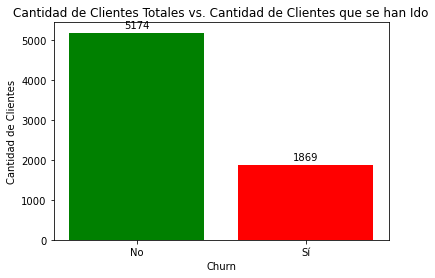

In [16]:
# Verificamos cuantos Clientes existen en el mes 

# Contar la cantidad de clientes que se han ido (Churn)
churn_counts = df['Churn'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(6, 4))  # Tamaño del gráfico
bars = plt.bar(churn_counts.index, churn_counts.values, color=['green', 'red'])
plt.xlabel('Churn')  # Etiqueta del eje X
plt.ylabel('Cantidad de Clientes')  # Etiqueta del eje Y
plt.title('Cantidad de Clientes Totales vs. Cantidad de Clientes que se han Ido')

# Agregar etiquetas a las barras
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                 textcoords='offset points',
                 ha='center', va='bottom')

plt.xticks(churn_counts.index, ['No', 'Sí'])  # Etiquetas del eje X (No y Sí)
plt.show()




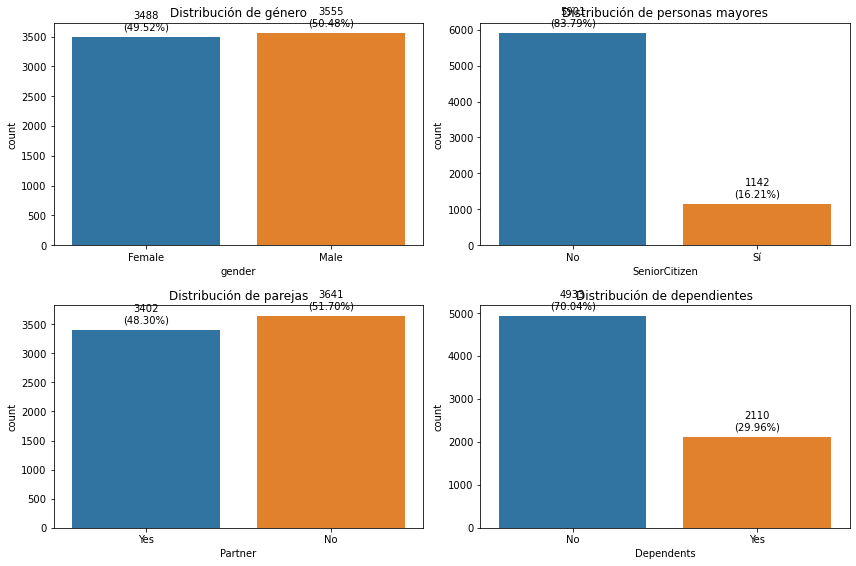

In [17]:
#  Verificamos como se distribuyen los principales atributos
# Configurar la cuadrícula de subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5)

# Gráfico de barras para "gender"
sns.countplot(x="gender", data=df, ax=axes[0, 0])
axes[0, 0].set_title("Distribución de género")

# Gráfico de barras para "SeniorCitizen"
sns.countplot(x="SeniorCitizen", data=df, ax=axes[0, 1])
axes[0, 1].set_title("Distribución de personas mayores")
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xticklabels(["No", "Sí"])

# Gráfico de barras para "Partner"
sns.countplot(x="Partner", data=df, ax=axes[1, 0])
axes[1, 0].set_title("Distribución de parejas")

# Gráfico de barras para "Dependents"
sns.countplot(x="Dependents", data=df, ax=axes[1, 1])
axes[1, 1].set_title("Distribución de dependientes")

# Agregar valores y pesos relativos en cada subplot
for ax in axes.flat:
    total_count = len(df)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}\n({(height/total_count*100):.2f}%)',
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 5),  # 5 puntos de desplazamiento vertical
                    textcoords='offset points',
                    ha='center', va='bottom')

# Ajustar el diseño general
plt.tight_layout()
plt.show()




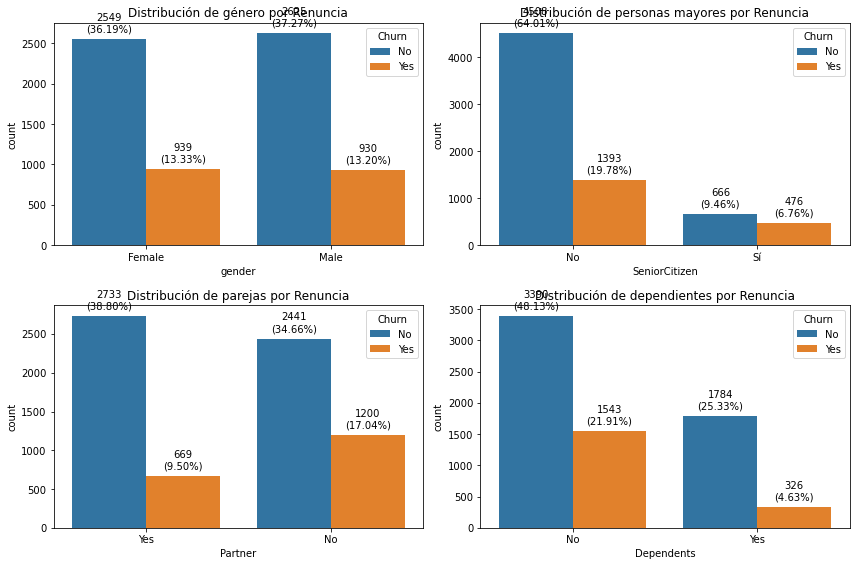

In [18]:
## Por atributo principal verificamos 
#1- En el caso de Sexo, no se ve un comportamiento determinante por sexo ( Cantidad de renunicias son similares).
#2- Cuando realiza,por Activos se verifica mayor renuncia que los pasivos
#3- Los que tienen pareja son los que en este mes mas renuncian 
#4 - Los que no tienen grupo familiar  son los que mayor renuncian

# Configurar la cuadrícula de subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5)

# Crear gráficos de barras apilados para "gender" en función de "Churn"
sns.countplot(x="gender", hue="Churn", data=df, ax=axes[0, 0])
axes[0, 0].set_title("Distribución de género por Renuncia")

# Crear gráficos de barras apilados para "SeniorCitizen" en función de "Churn"
sns.countplot(x="SeniorCitizen", hue="Churn", data=df, ax=axes[0, 1])
axes[0, 1].set_title("Distribución de personas mayores por Renuncia")
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xticklabels(["No", "Sí"])

# Crear gráficos de barras apilados para "Partner" en función de "Churn"
sns.countplot(x="Partner", hue="Churn", data=df, ax=axes[1, 0])
axes[1, 0].set_title("Distribución de parejas por Renuncia")

# Crear gráficos de barras apilados para "Dependents" en función de "Churn"
sns.countplot(x="Dependents", hue="Churn", data=df, ax=axes[1, 1])
axes[1, 1].set_title("Distribución de dependientes por Renuncia")

# Agregar valores y pesos relativos en cada subplot
for ax in axes.flat:
    total_count = len(df)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}\n({(height/total_count*100):.2f}%)',
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 5),  # 5 puntos de desplazamiento vertical
                    textcoords='offset points',
                    ha='center', va='bottom')

# Ajustar el diseño general
plt.tight_layout()
plt.show()


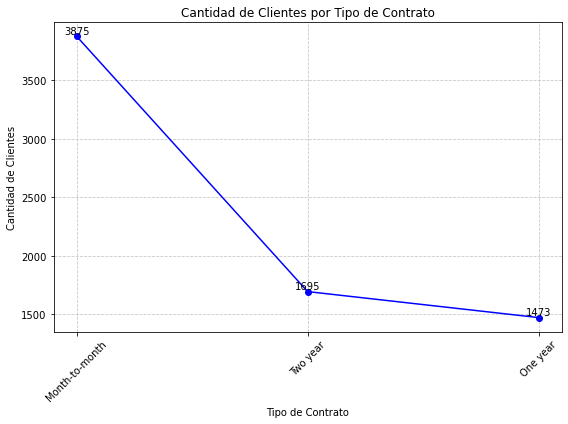

In [19]:
#Existen una mayoria de clientes con contrato mensual que a mayor plazo


# Calcular la cantidad de clientes por tipo de contrato
contract_counts = df['Contract'].value_counts()

# Crear un gráfico de línea
plt.figure(figsize=(8, 6))
plt.plot(contract_counts.index, contract_counts.values, marker='o', linestyle='-', color='b')
plt.title("Cantidad de Clientes por Tipo de Contrato")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Cantidad de Clientes")
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad
plt.grid(True, linestyle='--', alpha=0.7)

# Agregar etiquetas con los valores numéricos
for i, value in enumerate(contract_counts.values):
    plt.annotate(str(value), (contract_counts.index[i], value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [20]:
categoricas = ["gender",
                "SeniorCitizen",
                "Partner",
                "Dependents",
                "PaperlessBilling",
                "PaymentMethod"]
df_cate = df[categoricas]

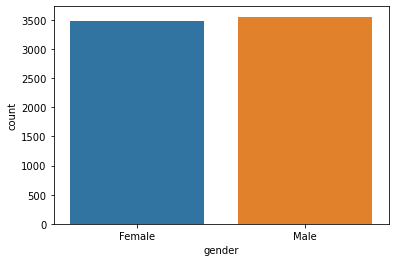

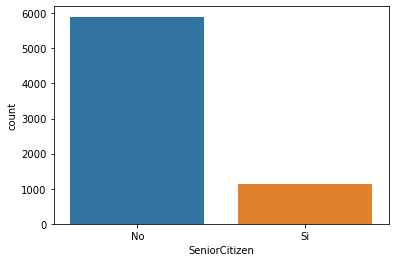

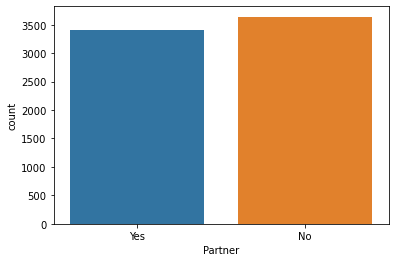

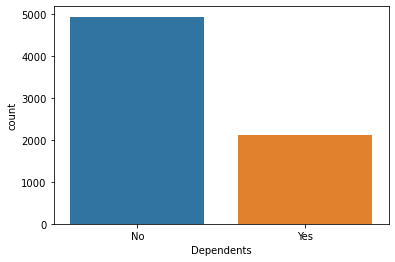

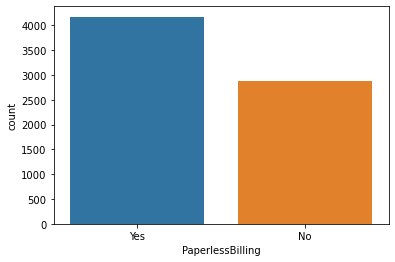

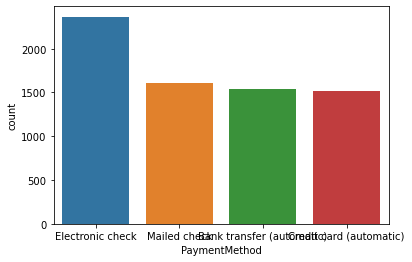

In [21]:
#Analizo dentro de cada variable como están compuestas.

def countplot(df, columns):
    for x in columns:
        sns.countplot(x=x, data=df)
        plt.show()

countplot(df, columns=df_cate)

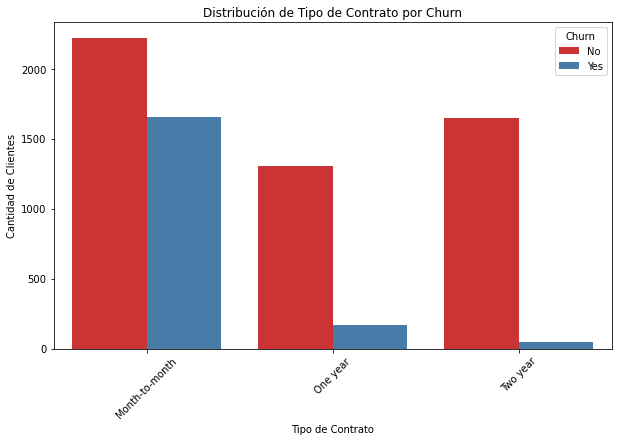

In [22]:
#Analizo la relación de tipo de contrato con el churn. 
#Observamos que de los que se fueron los "Month-to-Month" contracts son más comúnes.

# Crear un gráfico de barras apiladas para el tipo de contrato en función de Churn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set1')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de Clientes')
plt.title('Distribución de Tipo de Contrato por Churn')
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mayor claridad
plt.show()


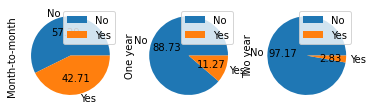

In [23]:
# Mostramos la participación por tipo de contrato.
plot = pd.crosstab(index=df['Churn'],
            columns=df['Contract']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='pie', stacked=True, subplots=True, autopct='%.2f')




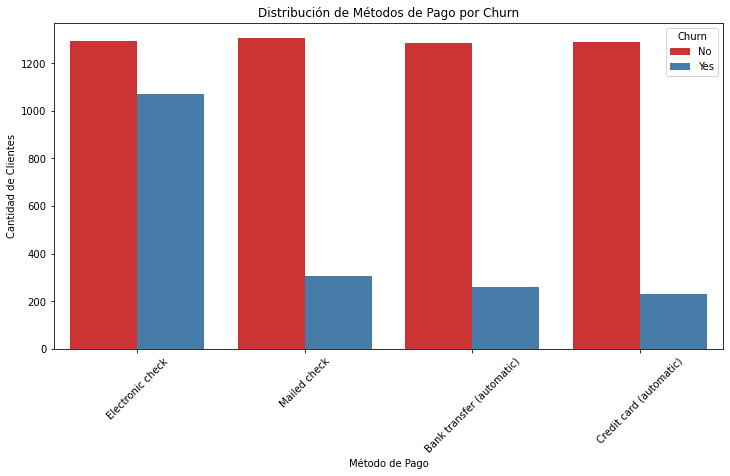

In [24]:
#Busco ver si el método de pago puede influir. Los automáticos desertan menos.

# Crear un gráfico de barras apiladas para el método de pago en función de Churn
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='Set1')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Clientes')
plt.title('Distribución de Métodos de Pago por Churn')
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mayor claridad
plt.show()

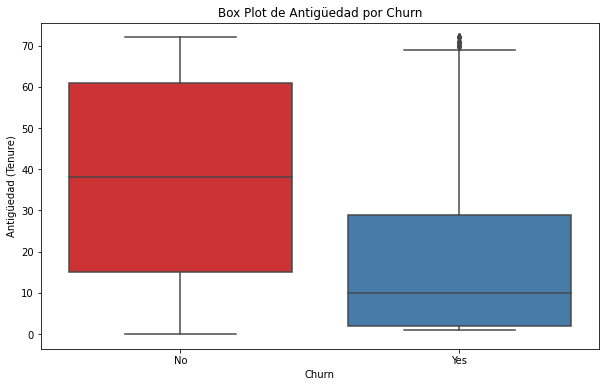

In [25]:

# Crear box plot de Tenure para Churned y not Churned
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='tenure', palette='Set1')
plt.xlabel('Churn')
plt.ylabel('Antigüedad (Tenure)')
plt.title('Box Plot de Antigüedad por Churn')
plt.show()



 #Analizo relación entre Tenure y Churn. Claramente observamos que los que se han ido tenían menos tiempo. 


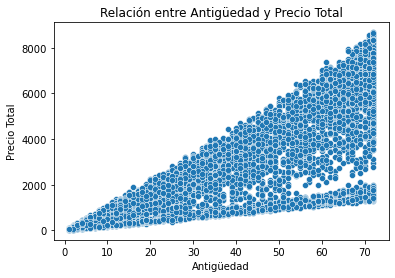

In [26]:
# Veo la relación entre antiguedad y precio total


# Supongamos que tienes un DataFrame llamado df con columnas "antigüedad(tenure)" y "precio_total(Total Charges)"
sns.scatterplot(x='tenure', y='TotalCharges', data=df)

# Puedes personalizar el gráfico agregando etiquetas y un título
plt.xlabel('Antigüedad')
plt.ylabel('Precio Total')
plt.title('Relación entre Antigüedad y Precio Total')

# Muestra el gráfico
plt.show()




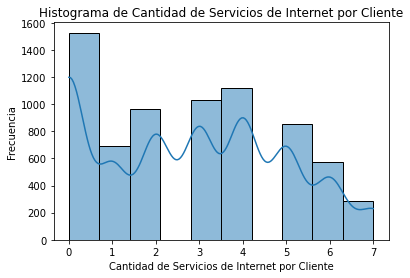

In [27]:

# Histograma de cantidad de clientes que toeme 1 o mas servicios de internet por Servicios de internet
sns.histplot(data=df, x='Cant_Internet', bins=10, kde=True)  # Puedes ajustar el número de bins según tus preferencias

# Personalizar el gráfico con etiquetas y título
plt.xlabel('Cantidad de Servicios de Internet por Cliente')
plt.ylabel('Frecuencia')
plt.title('Histograma de Cantidad de Servicios de Internet por Cliente')

# Mostrar el histograma
plt.show()